In [21]:
# ! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/airbnb.csv')

In [3]:
print(df.columns)
df.head()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:xlabel='price', ylabel='Count'>

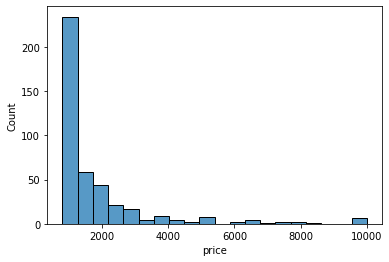

In [4]:
sns.histplot(df['price'][(df['price']>800)], bins=20)

<AxesSubplot:xlabel='price', ylabel='Count'>

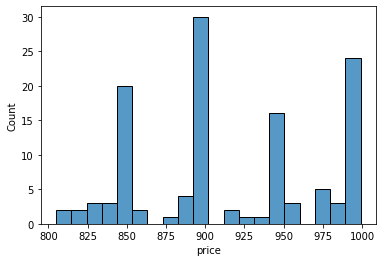

In [5]:
sns.histplot(df['price'][(df['price']>800) & (df['price']<1000)], bins=20)

<AxesSubplot:xlabel='price', ylabel='Count'>

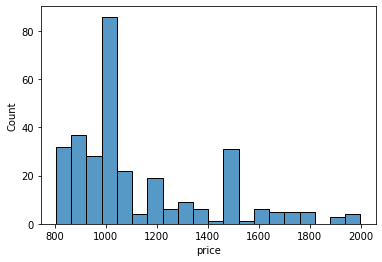

In [6]:
sns.histplot(df['price'][(df['price']>800) & (df['price']<2000)], bins=20)

In [7]:
lst = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
'availability_365']

df = df[lst]

### Find a feature with missing values. How many missing values does it have?



In [8]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### What's the median (50% percentile) for variable 'minimum_nights'?

In [9]:
df['minimum_nights'].median()

3.0

### Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the np.log1p() function.

In [10]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

In [11]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [12]:
idx = np.arange(n)

In [13]:
np.random.seed(42)
np.random.shuffle(idx)

In [14]:
# df_train = df.iloc[idx[:n_train]]
# df_val = df.iloc[idx[n_train:n_train+n_val]]
# df_test = df.iloc[idx[n_train+n_val:]]

In [15]:
# len(df_train), len(df_val), len(df_test)

In [16]:
n, n_val+n_test+n_train

(48895, 48895)

In [17]:
# df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)

In [18]:
# y_train = np.log1p(df_train['price']).values
# y_val = np.log1p(df_val['price']).values
# y_test = np.log1p(df_test['price']).values

In [19]:
# del df_train['price']
# del df_val['price']
# del df_test['price']

In [20]:
# len(y_train)

### Question:3 
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [54]:
def divData(df, seed):
    n = len(df)
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n-n_val-n_test
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = np.log1p(df_train['price']).values
    y_val = np.log1p(df_val['price']).values
    y_test = np.log1p(df_test['price']).values
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [58]:
def divData2(df):
    n = len(df)
    
    n_val = int(n*0.2)
    n_train = n-n_val
    idx = np.arange(n)
    
    np.random.seed(9)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    
    
    
    y_train = np.log1p(df_train['price']).values
    y_val = np.log1p(df_val['price']).values
    
    del df_train['price']
    del df_val['price']
    
    
    return df_train, df_val, y_train, y_val

In [23]:
df.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [24]:
df['reviews_per_month'].mean().round(2)

1.37

In [25]:
df_zero=df.copy()
# df_zero["reviews_per_month"].fillna(0.0, inplace = True)
df_mean=df.copy()
# df_mean["reviews_per_month"].fillna(df['reviews_per_month'].mean().round(2), inplace = True)

In [26]:
df_mean.loc[df['reviews_per_month'].isnull(), 'reviews_per_month'] = df['reviews_per_month'].mean().round(2)
df_mean.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,1.37,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [27]:
df_zero.loc[df['reviews_per_month'].isnull(), 'reviews_per_month'] = 0.0
df_zero.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,0.00,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Linear regression

In [28]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [29]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Missing values replaced with zero

In [30]:
df_train_zero, df_val_zero, y_train_zero, y_val_zero = divData2(df_zero)

In [31]:
w0, w = train_linear_regression(df_train_zero.values, y_train_zero)

In [32]:
y_pred = w0+df_train_zero.values.dot(w)

<AxesSubplot:ylabel='Count'>

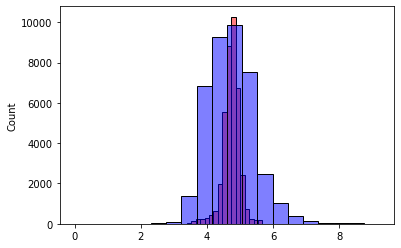

In [33]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=20)
sns.histplot(y_train_zero, color='blue', alpha=0.5, bins=20)

In [34]:
y_pred_val = w0+df_val_zero.values.dot(w)

In [35]:
rmse(y_val_zero, y_pred_val)

0.6536496462027795

### Missing values replaced with mean

In [36]:
df_train_mean, df_val_mean, y_train_mean, y_val_mean = divData2(df_mean)

In [37]:
w0, w = train_linear_regression(df_train_mean.values, y_train_mean)

In [38]:
y_pred = w0+df_train_mean.values.dot(w)

In [39]:
y_pred_val = w0+df_val_mean.values.dot(w)

In [40]:
rmse(y_val_mean, y_pred_val)

0.6536492473849567

In [44]:
regul = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [45]:
def train_linear_regression_regularized(X,y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]



### Train with regularizer

In [49]:
df_train_zero, df_val_zero, y_train_zero, y_val_zero = divData2(df_zero)
for i in range(len(regul)):
    w0, w = train_linear_regression_regularized(df_train_zero.values, y_train_zero, regul[i])
    y_pred_val = w0+df_val_zero.values.dot(w)
    print(f'Regularizer: {regul[i]}, RMSE: {round(rmse(y_val_zero, y_pred_val),2)}')
    

Regularizer: 0, RMSE: 0.65
Regularizer: 1e-06, RMSE: 0.65
Regularizer: 0.0001, RMSE: 0.65
Regularizer: 0.001, RMSE: 0.65
Regularizer: 0.01, RMSE: 0.66
Regularizer: 0.1, RMSE: 0.69
Regularizer: 1, RMSE: 0.69
Regularizer: 5, RMSE: 0.69
Regularizer: 10, RMSE: 0.69


In [52]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
for seed in seeds:
    df_train_zero_3, df_val_zero_3, df_test_zero_3, y_train_zero_3, y_val_zero_3, y_test_zero_3 = divData(df_zero, seed)
    w0, w =train_linear_regression(df_train_zero_3.values, y_train_zero_3)
    y_pred_val = w0+df_val_zero_3.values.dot(w)
    print(f'Seed: {seed}, RMSE: {round(rmse(y_val_zero_3, y_pred_val),2)}')
    print(f'Standard Deviation: {np.std(round(rmse(y_val_zero_3, y_pred_val),3))}')
    print('')

Seed: 0, RMSE: 0.65
Standard Deviation: 0.0

Seed: 1, RMSE: 0.65
Standard Deviation: 0.0

Seed: 2, RMSE: 0.65
Standard Deviation: 0.0

Seed: 3, RMSE: 0.64
Standard Deviation: 0.0

Seed: 4, RMSE: 0.64
Standard Deviation: 0.0

Seed: 5, RMSE: 0.63
Standard Deviation: 0.0

Seed: 6, RMSE: 0.63
Standard Deviation: 0.0

Seed: 7, RMSE: 0.65
Standard Deviation: 0.0

Seed: 8, RMSE: 0.65
Standard Deviation: 0.0

Seed: 9, RMSE: 0.64
Standard Deviation: 0.0



In [59]:
df_train_zero, df_val_zero, y_train_zero, y_val_zero = divData2(df_zero)

w0, w = train_linear_regression_regularized(df_train_zero.values, y_train_zero, 0.001)
y_pred_val = w0+df_val_zero.values.dot(w)
print(f'Regularizer: {regul[i]}, RMSE: {round(rmse(y_val_zero, y_pred_val),2)}')
    

Regularizer: 10, RMSE: 0.65
